# Classification

### What is Binary Classification?
Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

#### Pycaret classification

PyCaret's classification module `pycaret.classification` is a supervised machine learning module which is used for classifying the elements into groups based on various techniques and algorithms. The PyCaret classification module can be used for Binary or Multi-class classification problems.

## Import libraries

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric

from sklearn.model_selection import train_test_split

In [15]:
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Load dataset

Pycaret's repository has a lot of easily accessible datasets that we can load using `get_data` function.

In [2]:
# print all datasets available
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


### Heart disease dataset

For this tutorial we will use a dataset from UCI called *Heart disease data set*. This dataset contains information of potential heart disease patients from 1988. The target is to classify if the patient has heart disease or not (column `Disease`) There are 270 samples and 14 features. Short descriptions of each column are as follows:

**age** = age in years </br>
**sex** = 1=male, 0=female </br>
**chest_pain_type** = chest pain type </br>
-- Value 1: typical angina </br>
-- Value 2: atypical angina </br>
-- Value 3: non-anginal pain </br>
-- Value 4: asymptomatic </br>
**resting_blood_pressure** = resting blood pressure in mmHg  </br>
**serum_cholestoral_in_mg/dl** = serum cholestoral in mg/dl </br>
**fasting_blood_sugar_>_120_mg/dl** = 1=true, 0=false </br>
**resting_electrocardiographic_results** =  </br>
-- Value 0: normal </br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) </br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria </br>
**maximum_heart_rate_achieved** =  </br>
**exercise_induced_angina** = 1=true, 0=false </br>
**oldpeak** = ST depression induced by exercise relative to rest </br>
**slope_of_peak** = the slope of the peak exercise ST segment </br>
-- Value 1: upsloping </br>
-- Value 2: flat </br>
-- Value 3: downsloping </br>
**number_of_major_vessels** = number of major vessels (0-3) colored by flourosopy </br>
**thal** = 3 = normal; 6 = fixed defect; 7 = reversable defect </br>
**Disease** =  </br>
-- Value 0: < 50% diameter narrowing, no disease </br>
-- Value 1: > 50% diameter narrowing, disease </br>

In [2]:
# load data
df = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<div class='alert alert-warning'>
<h4>Exercise 1. </h4>Column names have spaces between words and after the names as well. Delete all spaces after column names and then replace all remaning spaces with underscores.
</div>

**Hint**: Use `strip()` and `replace()` functions.

In [ ]:
# Ex1


In [4]:
# %load solutions/pyc_1.py

df.columns = [c.strip() for c in df.columns]
df.columns = [c.replace(' ', '_') for c in df.columns]


In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar_>_120_mg/dl,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak,number_of_major_vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
df.to_csv('./data/heart_disease.csv')

In [ ]:
df.describe()

## Visualizing

In [12]:
# split dataset to data and target
data = df.loc[:, df.columns != 'Disease']
target = df['Disease']

In [13]:
# easy function for plotting features
def boxplot(data, x, y):
    plt.figure(figsize = (10,7))

    # Usual boxplot
    ax = sns.boxplot(x=x, y=y, data=data)
 
    # Add jitter with the swarmplot function.
    ax = sns.swarmplot(x=x, y=y, data=data, color="grey")

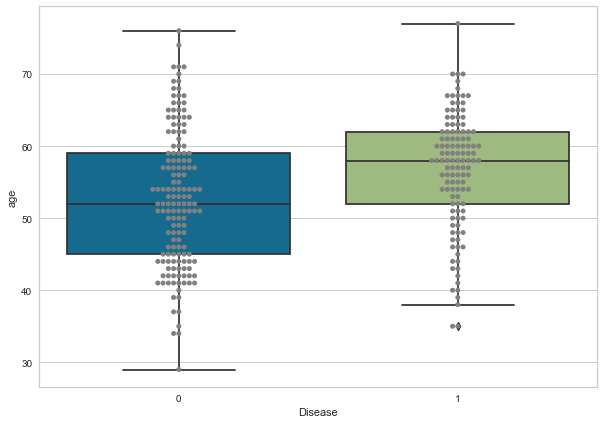

In [16]:
# plot age and target
boxplot(data, target, 'age')

Pycaret will do the train-test-split automatically but we can save part of the data to test on the finalized model. This way we can test the finalized model using completely new unseen data.

In [17]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (243, 14)
Unseen Data For Predictions: (27, 14)


## Preprocessing
**Normalization**: Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly. For instance, in the dataset we are using for this example the AGE feature ranges between 29 to 77 while other numeric features like cholesterol range from 126 to 564. <a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling">Read more</a>

**Transformation**: While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.) <a href="https://en.wikipedia.org/wiki/Power_transform">Read more</a>

## Setting up Environment in PyCaret

### Classification in Pycaret

`setup()` is Pycaret's main function and it needs to be run before executing any other function in pycaret. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

We'll set normalize and transformation *True* for automatic preprocessing.

In [18]:
# `session_id` parameter is equivalent to ‘random_state’ in scikit-learn. Let's use 42 for reproducibility.
s = setup(data, target='Disease', normalize = True, transformation = True, session_id=42)

,Description,Value
0,Session id,42
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(243, 14)"
4,Transformed data shape,"(243, 14)"
5,Transformed train set shape,"(170, 14)"
6,Transformed test set shape,"(73, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

**session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 42 for later reproducibility.

**Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

**Original Data** : Displays the original shape of the dataset. In this experiment (256, 14) means 256 samples and 14 features including the target column.

**Transformation method** : By default, the transformation method is set to ‘yeo-johnson’. The other available option for transformation is ‘quantile’. Can be changed using *transformation_method* parameter.

**Normalize method** : By default, normalize method is set to ‘zscore’. The other available option for normalizing is 'minmax'. Can be changed using *normalize_method* parameter. 

## Create a model

In [ ]:
# list all ML models
models()

Pycaret runs all different ML algorhitms using default parameters. We can compare all models using `compare_models()` which puts all models in order from best to worst.

In [ ]:
# best model is saved in best_model object
best_model = compare_models()

This gives us lots of metrics we can use to evaluate the results:


**Accuracy** = $ \frac{Correctly\:predicted}{Total\:samples}$  <br>
It's simple and informative but doesn't give us the whole picture since sometimes e.g. false negative predictions should be minimized. <br><br>

**Precision** = $ \frac{True\:positive}{Total\:predicted\:positive}$ <br>
Precision is a measure to determine, how precise model's positive predictions are. If model is trying to predict spam-emails (1), low precision means that rate of false positives is high i.e. lots of valid emails (0) are classified as spam.<br> <br>

**Recall** = $ \frac{True\:positive}{Total\:actually\:positive}$ <br>
In other words how many actual positives are classified correctly. Using the same example, spam emails leak into your inbox as normal emails if recall is low. <br><br>

**F1** = $ 2* \frac{Precision*Recall}{Precision+Recall}$ <br>
F1 score tells the balance between precision and recall. It's similar to accuracy but takes false positives and negatives into account, making it better metric if false predictions are significant. In addition if class distribution is uneven (e.g lots of negatives and only few positives), model may predict all negative, making accuracy high but F1-score low.


<img src="./assets/precisionrecall.png" width="400" height="500">

Let's make few models using 10 fold stratified **cross validation**. You can change number of folds using `fold` parameter

In [19]:
# logistic regression
lr = create_model('lr', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.824,0.943,0.571,1.000,0.727,0.611,0.663
1,0.941,0.986,1.000,0.875,0.933,0.881,0.887
2,0.765,0.914,0.714,0.714,0.714,0.514,0.514
3,0.882,0.900,0.714,1.000,0.833,0.746,0.772
4,0.882,0.986,1.000,0.778,0.875,0.767,0.789
5,0.647,0.643,0.571,0.571,0.571,0.271,0.271
6,0.824,0.903,0.625,1.000,0.769,0.638,0.685
7,0.765,0.958,0.625,0.833,0.714,0.521,0.537
8,0.824,0.875,0.750,0.857,0.800,0.643,0.648


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
# random forest classifier 
rf = create_model('rf', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.824,0.900,0.714,0.833,0.769,0.628,0.633
1,0.824,0.914,1.000,0.700,0.824,0.658,0.700
2,0.824,0.971,0.714,0.833,0.769,0.628,0.633
3,0.882,0.886,0.714,1.000,0.833,0.746,0.772
4,0.882,1.000,1.000,0.778,0.875,0.767,0.789
5,0.706,0.700,0.571,0.667,0.615,0.380,0.383
6,0.824,0.917,0.625,1.000,0.769,0.638,0.685
7,0.941,0.986,0.875,1.000,0.933,0.881,0.887
8,0.824,0.868,0.750,0.857,0.800,0.643,0.648


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
# k nearest neighbors
knn = create_model('knn', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.824,0.914,0.571,1.000,0.727,0.611,0.663
1,0.882,0.986,1.000,0.778,0.875,0.767,0.789
2,0.882,0.943,0.857,0.857,0.857,0.757,0.757
3,0.824,0.829,0.571,1.000,0.727,0.611,0.663
4,0.882,0.921,0.857,0.857,0.857,0.757,0.757
5,0.706,0.636,0.571,0.667,0.615,0.380,0.383
6,0.765,0.861,0.625,0.833,0.714,0.521,0.537
7,0.882,0.958,0.875,0.875,0.875,0.764,0.764
8,0.765,0.882,0.750,0.750,0.750,0.528,0.528


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Plotting the models

#### Confusion matrix

A confusion matrix summarizes the accuracy of a classification algorithm.

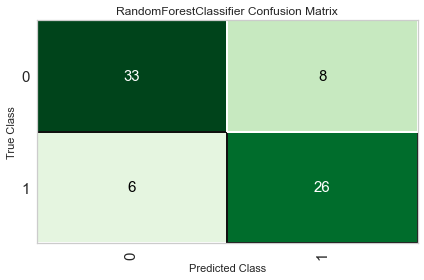

In [22]:
plot_model(rf, plot = 'confusion_matrix')

#### ROC curves

Another way to evaluate models is the area under the ROC curve. Here we record the model's *true positive rate* and *false positive rate* under a variation of classification thresholds, and plot them against eachother. This area (AUC) is a particularly good summary statistic, very useful when classes are imbalanced.

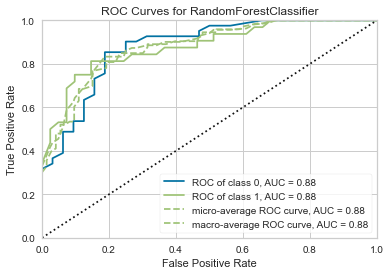

In [23]:
plot_model(rf, plot='auc')

#### Error plot

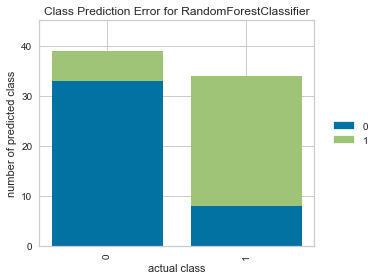

In [24]:
plot_model(rf, plot = 'error')

#### Boundary plot

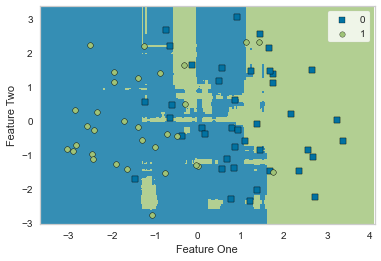

In [25]:
plot_model(rf, plot = 'boundary')

#### Feature plot

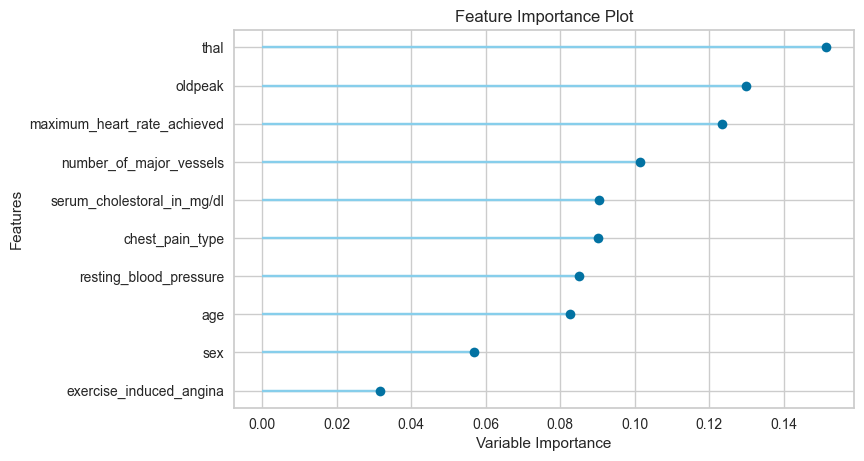

In [26]:
plot_model(rf, plot='feature')

<div class='alert alert-warning'>
<h4>Exercise 2. </h4>What are the most important features? Plot the four most important variables with seaborn pairplot using 'Disease' as hue and check if you can notice any correlation.
</div>

In [ ]:
# Ex2


In [43]:
# %load solutions/pyc_2.py

Overwriting solutions/pyc_2.py


## Tune a model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. The `tune_model()` function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'AUC') will search for the hyperparameters of a Decision Tree Classifier that results in highest AUC.

In [ ]:
tuned_lr = tune_model(lr, round=3)

In [ ]:
tuned_rf = tune_model(rf, round=3)

In [ ]:
tuned_knn = tune_model(knn, round=3)

Notice how the results after tuning have improved:

**Logistic regression:** no change </br>
**Random forest classification:** from `0.799` to `0.838`  </br>
**K nearest neighbors:** from `0.788` to `0.849`  </br>

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc.

## Predict on test data

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid after running `setup()`, you will see that 30% (154 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_knn variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [ ]:
predict_model(tuned_knn);

The accuracy of test set is `0.818` compared to `0.849` achieved with the train set. This is not significant difference (since the dataset is quite small) but if there is a large variation between the test and train results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and then predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

## Finalize model

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [ ]:
final_knn = finalize_model(tuned_knn)

## Predict on unseen data

Now we can use the test data `X_test` and try to classify them with our trained model. For this we use pycaret's `predict_model()` function and pass the unseen testdata as parameter.

In [ ]:
predictions = predict_model(final_knn, data=X_test) # pass the model and test-data as parameters
predictions.head()

The *Label* and *Score* columns are added onto the X_test set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `y_test` available. To do that we will use pycaret.utils module. You can do this easily with basic python, but this is good way if you want to check any other metrics (other than accuracy) as well. See example below:

In [ ]:
from pycaret.utils import check_metric

# compare target and predicted labels
print("Prediction accuracy", check_metric(y_test, predictions['Label'], metric = 'Accuracy')) 
print("Prediction recall",check_metric(y_test, predictions['Label'], metric = 'Recall'))

You can use sklearn to plot confusion matrix:

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(final_knn, X=X_test, y_true=y_test, cmap='Blues') # parameters: model, input values X, target values y

<div class='alert alert-warning'>
<h4>Exercise 3. Run setup() again but this time without any preprocessing. Then make the same models (logistic regression, random forest and knn, no need to tune) and compare results. </h4>
    
Use session_id=42
</div>    



In [ ]:
# Ex3

In [ ]:
#%load solutions/pyc_3.py